In [1]:
import random
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings("ignore")
rs = np.random.RandomState(0)
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['font.size'] = 16
import matplotlib;matplotlib.rcParams['font.family'] = 'serif'
from visualize import *
from calibration import *
from active_learning import *
from collections import defaultdict
from tqdm import tqdm
from spline import *
import collections


NUM_BINS = 10
NUM_CLASSES =  100
NUM_CLASSES_PLOT = 4
NUM_COL = 5
NUM_RUN = 50
# limit to the cases when the number of samples is less than 1000
NUM_SAMPLES = [20, 30, 40, 50, 60, 70, 80, 90, 100] + [50 * _ for _ in range(3, 19)] 
print len(NUM_SAMPLES) # should not exceed 25 because the number of subplots is set to be 25.
METHOD_NAME = "binary_spline"

25
25


try out the PyGAM package (e.g., Logistic GAM with splines) for one or more of our datasets (e.g., p(y=1 | max_k s_k(x)) for calibration, or Accuracy( g (x) ) versus g(x) where g(x) is brightness - to get a sense whether this approach is a bit more robust than (say) GP classification methods.

In [2]:
# Load prediction from ResNet on CIFAR100 test data, which contains 10,000 images. 
# https://github.com/rloganiv/pytorch-classification/blob/master/predict.py
# data: a numpy array of size 10,000 * 101. For each row, the first entry is the true label,
#       following by softmax of output logits of this image for each class.
# DATASET = "cifar100/cifar100_predictions_dropout"
DATASET = "cifar100_predictions_dropout"
data = np.genfromtxt("data/cifar100/%s.txt" % DATASET)# 10000*101
N = data.shape[0]
score = data[:,1:]
Y_predict = np.argmax(score, axis=1)
Y_true = data[:,0]
print "ACC=%.4f" % ((Y_predict == Y_true).sum() * 1.0/ N)

ACC=0.7414


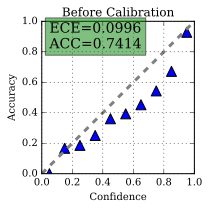

In [3]:
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(3)
ece, acc, mse, ax = reliability_plot(ax, score, Y_true, NUM_BINS)
ax.set_title("Before Calibration")
fig.tight_layout()

In [4]:
# train a Spline regression model using all available data points as a reference model.
# MSE between this spline curve and the one trained on selected datapoints will be computed as a metric for evaluation.
gam_ref = LogisticGAM(s(0, constraints='monotonic_inc')).gridsearch(
                    np.max(score, axis=1).reshape(-1, 1),
                    np.array(Y_true == Y_predict) * 1) # add a linear term

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


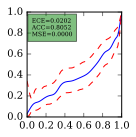

In [5]:
# feed all data into spline regression
fig, ax = plt.subplots()
fig.set_figheight(2)
fig.set_figwidth(2)
ece, acc, mse, ax, confi = spline_classification_plot(ax,
                           np.max(score, axis=1).reshape(-1, 1),
                           np.array(Y_true == Y_predict) * 1,
                           np.max(score, axis=1).reshape(-1, 1),
                           np.array(Y_true == Y_predict) * 1,
                           gam_ref)
fig.tight_layout()

# active learning

In [6]:
training_list = [i for i in range(N)]
subset_init = np.random.choice(training_list, size = NUM_SAMPLES[0], replace = False).tolist()

### randomly select datapoints and feed to spline regression

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

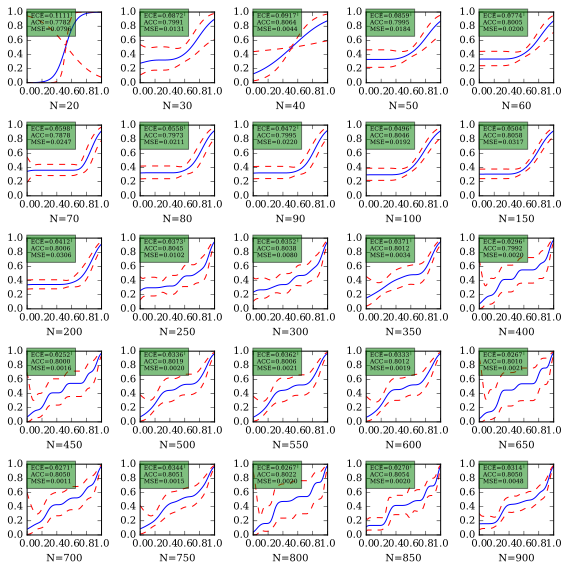

In [7]:
ece_random_emp, acc_random_emp, subset_random_emp = active_learning_plot(
    score, Y_predict, Y_true, acq_random_emp, subset_init, training_list, NUM_SAMPLES, gam_ref)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

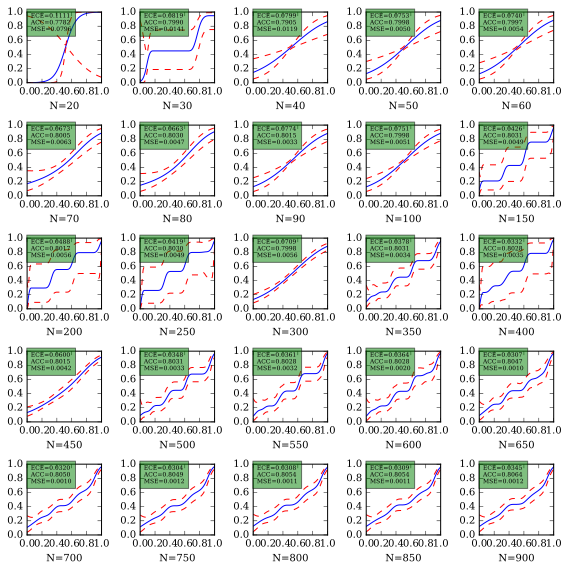

In [8]:
ece_random_unf, acc_random_unf, subset_random_unf = active_learning_plot(
    score, Y_predict, Y_true, acq_random_unf, subset_init, training_list, NUM_SAMPLES, gam_ref)

### actively select datapoints and feed into spline regression

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:06

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

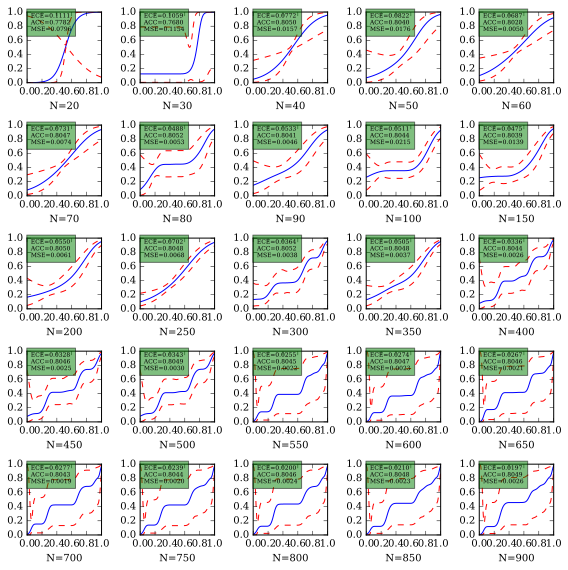

In [9]:
# reweight datapoints acccording to uncertainty
ece_active_prb, acc_active_prb, subset_active_prb = active_learning_plot(
    score, Y_predict, Y_true, acq_active_prb, subset_init, training_list, NUM_SAMPLES, gam_ref)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

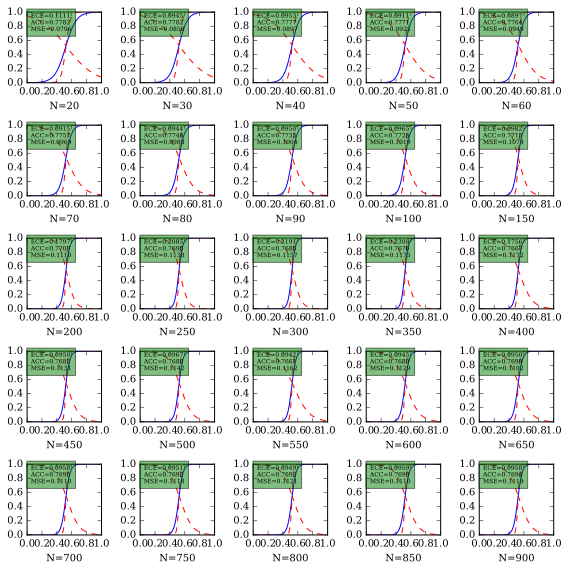

In [10]:
## select data points with highest uncertainty
ece_active_dtm, acc_active_dtm, subset_active_dtm = active_learning_plot(
    score, Y_predict, Y_true, acq_active_dtm, subset_init, training_list, NUM_SAMPLES, gam_ref)

### Compare different acquisition methods in a single run

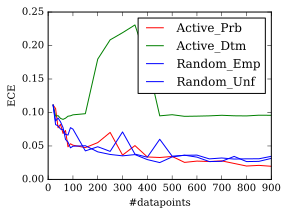

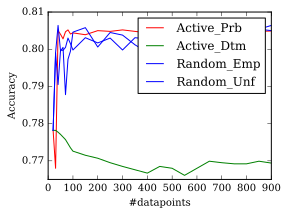

In [11]:
plt.figure(figsize = (4,3))
plt.plot(NUM_SAMPLES, 
             [ece_active_prb[_] for _ in NUM_SAMPLES], 
             c = 'r', label="Active_Prb")
plt.plot(NUM_SAMPLES, 
             [ece_active_dtm[_] for _ in NUM_SAMPLES], 
             c = 'g', label="Active_Dtm")
plt.plot(NUM_SAMPLES, 
             [ece_random_emp[_] for _ in NUM_SAMPLES], 
             c = 'b', label="Random_Emp")
plt.plot(NUM_SAMPLES, 
             [ece_random_unf[_] for _ in NUM_SAMPLES], 
             c = 'b', label="Random_Unf")
plt.xlabel("#datapoints")
plt.ylabel("ECE")
plt.legend()
plt.figure(figsize = (4,3))
plt.plot(NUM_SAMPLES, 
             [acc_active_prb[_] for _ in NUM_SAMPLES], 
             c = 'r', label="Active_Prb")
plt.plot(NUM_SAMPLES, 
             [acc_active_dtm[_] for _ in NUM_SAMPLES], 
             c = 'g', label="Active_Dtm")
plt.plot(NUM_SAMPLES, 
             [acc_random_emp[_] for _ in NUM_SAMPLES],
             c = 'b', label="Random_Emp")
plt.plot(NUM_SAMPLES, 
             [acc_random_unf[_] for _ in NUM_SAMPLES],
             c = 'b', label="Random_Unf")
plt.xlabel("#datapoints")
plt.ylabel("Accuracy")
plt.legend()

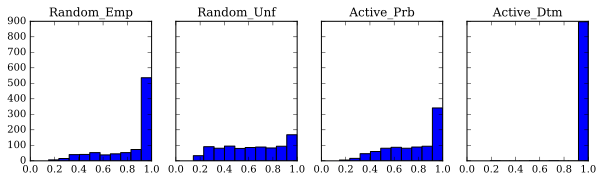

In [12]:
# compare the histogram of scores of datapoints selected with different methods
fig, ax = plt.subplots(nrows=1, ncols=4, sharey = True)
fig.set_figheight(2.5)
fig.set_figwidth(10)
ax[0].hist(np.max(score, axis=1).reshape(-1, 1)[subset_random_emp])
ax[0].set_xlim(0.0, 1.0)
ax[0].set_title("Random_Emp")
ax[1].hist(np.max(score, axis=1).reshape(-1, 1)[subset_random_unf])
ax[1].set_xlim(0.0, 1.0)
ax[1].set_title("Random_Unf")
ax[2].hist(np.max(score, axis=1).reshape(-1, 1)[subset_active_prb])
ax[2].set_xlim(0.0, 1.0)
ax[2].set_title("Active_Prb")
ax[3].hist(np.max(score, axis=1).reshape(-1, 1)[subset_active_dtm])
ax[3].set_xlim(0.0, 1.0)
ax[3].set_title("Active_Dtm")

## Multiple runs to get errorbars

In [13]:
######### run spline_run.py for a given dataset for multiple runs.
# results will be written to output/DATASET with filenames ece_random.csv, 
# ece_active.csv, acc_random.csv, acc_active.csv.

# disij@datalab-5 22:19:44 ~/projects/sandbox/nn_assessor
# python spline_run.py


######### load the results
def loadcsv(filename):
    """
    INPUT:
        filename:  a csv file. can be ece_random, ece_active, acc_random, 
                    acc_active in this case.
    OUTPUT:
        result_dict: defaultdict(list). can be ece_random, ece_active, 
                    acc_random, acc_active in this case.
    """
    import csv
    result_dict = defaultdict(list)
    with open(filename, 'r') as f:
        for line in f.readlines():
            line = line.split(",")
            result_dict[int(line[0])].append([float(_) for _ in line[1:]])
    return result_dict

ece_random_emp_multi_run = loadcsv("output/%s/ece_random_emp.csv" % DATASET)
acc_random_emp_multi_run = loadcsv("output/%s/acc_random_emp.csv" % DATASET)
mse_random_emp_multi_run = loadcsv("output/%s/mse_random_emp.csv" % DATASET)
ece_random_unf_multi_run = loadcsv("output/%s/ece_random_unf.csv" % DATASET)
acc_random_unf_multi_run = loadcsv("output/%s/acc_random_unf.csv" % DATASET)
mse_random_unf_multi_run = loadcsv("output/%s/mse_random_unf.csv" % DATASET)
ece_active_prb_multi_run = loadcsv("output/%s/ece_active_prb.csv" % DATASET)
acc_active_prb_multi_run = loadcsv("output/%s/acc_active_prb.csv" % DATASET)
mse_active_prb_multi_run = loadcsv("output/%s/mse_active_prb.csv" % DATASET)
ece_active_dtm_multi_run = loadcsv("output/%s/ece_active_dtm.csv" % DATASET)
acc_active_dtm_multi_run = loadcsv("output/%s/acc_active_dtm.csv" % DATASET)
mse_active_dtm_multi_run = loadcsv("output/%s/mse_active_dtm.csv" % DATASET)

IOError: [Errno 2] No such file or directory: 'output/cifar100_predictions_dropout/acc_random_emp.csv'

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(3)
fig.set_figwidth(10)
ax[0].errorbar(NUM_SAMPLES, 
             [np.mean(ece_active_prb_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(ece_active_prb_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'r', label="Active_Prb")
ax[0].errorbar(NUM_SAMPLES, 
             [np.mean(ece_active_dtm_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(ece_active_dtm_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'g', label="Active_Dtm")
ax[0].errorbar(NUM_SAMPLES, 
             [np.mean(ece_random_emp_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(ece_random_emp_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'b', label="Random_Emp")
ax[0].errorbar(NUM_SAMPLES, 
             [np.mean(ece_random_unf_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(ece_random_unf_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'b', label="Random_Unf")
ax[0].set_xlabel("#datapoints")
ax[0].set_ylabel("ECE")
ax[0].legend()
ax[1].errorbar(NUM_SAMPLES, 
             [np.mean(acc_active_prb_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(acc_active_prb_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'r', label="Active_Prb")
ax[1].errorbar(NUM_SAMPLES, 
             [np.mean(acc_active_dtm_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(acc_active_dtm_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'g', label="Active_Dtm")
ax[1].errorbar(NUM_SAMPLES, 
             [np.mean(acc_random_emp_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(acc_random_emp_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'b', label="Random_Emp")
ax[1].errorbar(NUM_SAMPLES, 
             [np.mean(acc_random_unf_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(acc_random_unf_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'b', label="Random_Unf")
ax[1].set_xlabel("#datapoints")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[2].errorbar(NUM_SAMPLES, 
             [np.mean(mse_active_prb_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(mse_active_prb_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'r', label="Active_Prb")
ax[2].errorbar(NUM_SAMPLES, 
             [np.mean(mse_active_dtm_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(mse_active_dtm_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'g', label="Active_Dtm")
ax[2].errorbar(NUM_SAMPLES, 
             [np.mean(mse_random_emp_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(mse_random_emp_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'b', label="Random_Emp")
ax[2].errorbar(NUM_SAMPLES, 
             [np.mean(mse_random_unf_multi_run[_]) for _ in NUM_SAMPLES], 
             yerr = [np.std(mse_random_unf_multi_run[_]) for _ in NUM_SAMPLES],
             c = 'b', label="Random_Unf")
ax[2].set_xlabel("#datapoints")
ax[2].set_ylabel("MSE from GAM_ref")
ax[2].legend()

In [ ]:
N_plot = 10
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(3)
fig.set_figwidth(10)
ax[0].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(ece_active_prb_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(ece_active_prb_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'r', label="Active_Prb")
ax[0].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(ece_active_dtm_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(ece_active_dtm_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'g', label="Active_Dtm")
ax[0].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(ece_random_emp_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(ece_random_emp_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'b', label="Random_Emp")
ax[0].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(ece_random_unf_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(ece_random_unf_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'b', label="Random_Unf")
ax[0].set_xlabel("#datapoints")
ax[0].set_ylabel("ECE")
ax[0].legend()
ax[1].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(acc_active_prb_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(acc_active_prb_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'r', label="Active_Prb")
ax[1].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(acc_active_dtm_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(acc_active_dtm_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'g', label="Active_Dtm")
ax[1].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(acc_random_emp_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(acc_random_emp_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'b', label="Random_Emp")
ax[1].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(acc_random_unf_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(acc_random_unf_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'b', label="Random_Unf")
ax[1].set_xlabel("#datapoints")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[2].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(mse_active_prb_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(mse_active_prb_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'r', label="Active_Prb")
ax[2].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(mse_active_dtm_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(mse_active_dtm_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'g', label="Active_Dtm")
ax[2].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(mse_random_emp_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(mse_random_emp_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'b', label="Random_Emp")
ax[2].errorbar(NUM_SAMPLES[:N_plot], 
             [np.mean(mse_random_unf_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]], 
             yerr = [np.std(mse_random_unf_multi_run[_]) for _ in NUM_SAMPLES[:N_plot]],
             c = 'b', label="Random_Unf")
ax[2].set_xlabel("#datapoints")
ax[2].set_ylabel("MSE from GAM_ref")
ax[2].legend()